# Manipulating Time Series Data in Python - Part 3

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Datasets

### Ozone NYC

In [7]:
ozone_nyc = pd.read_csv('../datasets/air_quality_data/ozone_nyc.csv', index_col='date', parse_dates=['date'])

## Window Functions: Rolling & Expanding Metrics
This chapter will show you how to use window function to calculate time series metrics for both rolling and expanding windows.

### Rolling average air quality since 2010 for new york city
The last video was about rolling window functions. To practice this new tool, you'll start with air quality trends for New York City since 2010. In particular, you'll be using the daily Ozone concentration levels provided by the Environmental Protection Agency to calculate & plot the 90 and 360 day rolling average.

In [47]:
data = ozone_nyc.copy()

In [48]:
data.head()

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754


In [49]:
# Calculate 90d and 360d rolling mean for the last price
data['90D'] = data.Ozone.rolling('90D').mean()
data['360D'] = data.Ozone.rolling('360D').mean()

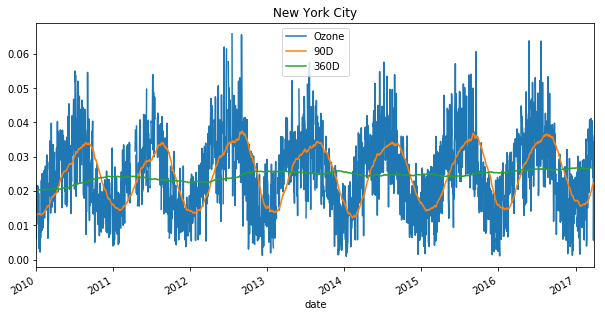

In [50]:
# Plot data
data['2010':].plot(title='New York City', figsize=(10,5));

### Rolling 360-day median & std. deviation for nyc ozone data since 2000
The last video also showed you how to calculate several rolling statistics using the .agg() method, similar to .groupby().

Let's take a closer look at the air quality history of NYC using the Ozone data you have seen before. The daily data are very volatile, so using a longer term rolling average can help reveal a longer term trend.

You'll be using a 360 day rolling window, and .agg() to calculate the rolling mean and standard deviation for the daily average ozone values since 2000.

In [51]:
data = ozone_nyc.copy().dropna()

In [52]:
# Calculate the rolling mean and std here
rolling_stats = data.Ozone.rolling(360).agg(['mean', 'std'])

In [53]:
# Join rolling_stats with ozone data
stats = data.join(rolling_stats)

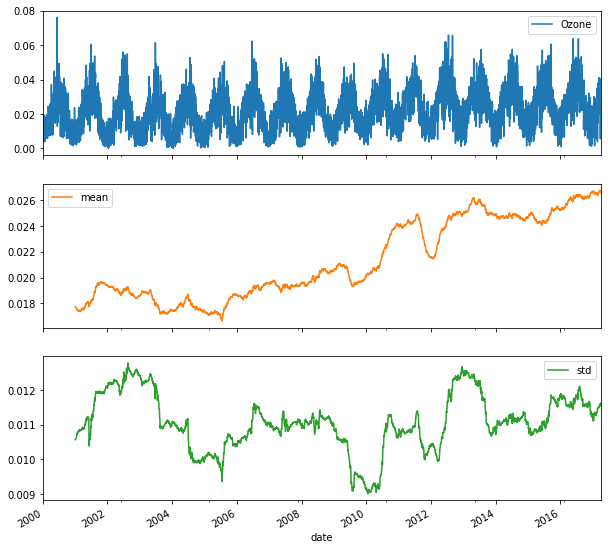

In [54]:
# Plot stats
stats.plot(subplots=True, figsize=(10, 10));

### Rolling quantiles for daily air quality in nyc
You learned in the last video how to calculate rolling quantiles to describe changes in the dispersion of a time series over time in a way that is less sensitive to outliers than using the mean and standard deviation.

Let's calculate rolling quantiles - at 10%, 50% (median) and 90% - of the distribution of daily average ozone concentration in NYC using a 360-day rolling window.

In [55]:
data = ozone_nyc.copy()

In [56]:
# Resample, interpolate and inspect ozone data here
data = data.resample('D').interpolate()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
Ozone    6300 non-null float64
dtypes: float64(1)
memory usage: 98.4 KB
None


In [57]:
# Create the rolling window
rolling = data.Ozone.rolling(360)

In [58]:
# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(0.1)
data['q50'] = rolling.median()
data['q90'] = rolling.quantile(0.9)

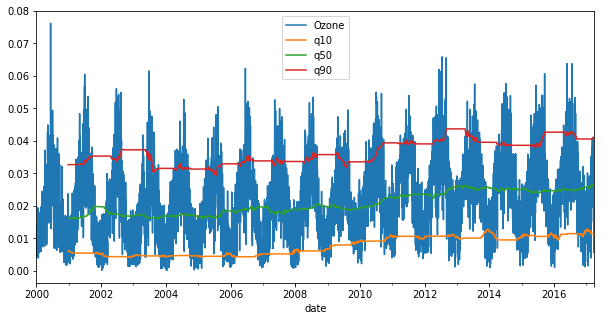

In [59]:
# Plot the data
data.plot(figsize=(10,5));

### Cumulative sum vs .diff()
In the video, you have learned about expanding windows that allow you to run cumulative calculations.

The cumulative sum method has in fact the opposite effect of the .diff() method that you came across in chapter 1.

To illustrate this, let's use the Google stock price time series, create the differences between prices, and reconstruct the series using the cumulative sum.